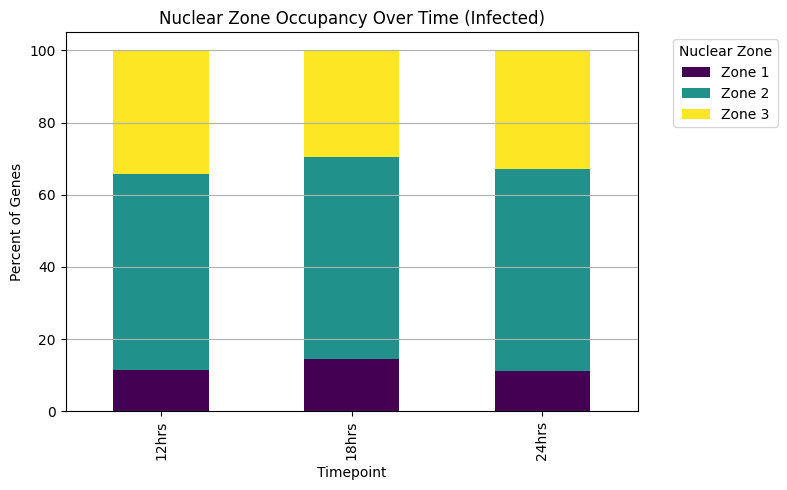

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings
base_path = "data/green_monkey/all_structure_files/chr1"
timepoints = ["12hrs", "18hrs", "24hrs"]
condition = "vacv"
num_zones = 3  # Number of radial nuclear shells

# Helper: Assign radial zone based on distance from center
def assign_radial_zones(coords, num_zones):
    centroid = coords.mean(axis=0)
    distances = np.linalg.norm(coords - centroid, axis=1)
    max_dist = distances.max()
    bins = np.linspace(0, max_dist, num_zones + 1)
    zone_labels = np.digitize(distances, bins, right=False) - 1
    return zone_labels, bins

# Compute zone occupancy per timepoint
zone_counts = {tp: np.zeros(num_zones) for tp in timepoints}

for tp in timepoints:
    csv_path = os.path.join(base_path, tp, condition, f"structure_{tp}_{condition}_gene_info.csv")
    if not os.path.exists(csv_path):
        print(f"Missing file: {csv_path}")
        continue

    df = pd.read_csv(csv_path)
    coords = df[['middle_x', 'middle_y', 'middle_z']].dropna().values
    zones, bins = assign_radial_zones(coords, num_zones)

    for z in range(num_zones):
        zone_counts[tp][z] = np.sum(zones == z)

# Normalize counts to %
zone_props = pd.DataFrame(zone_counts)
zone_props = zone_props.div(zone_props.sum(axis=0), axis=1) * 100
zone_props.index = [f"Zone {i+1}" for i in range(num_zones)]

# Plot 
zone_props.T.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8, 5))
plt.title("Nuclear Zone Occupancy Over Time (Infected)")
plt.xlabel("Timepoint")
plt.ylabel("Percent of Genes")
plt.legend(title="Nuclear Zone", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()
